In [35]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.cross_validation import train_test_split
import random

In [36]:
TRAIN_URL = "http://download.tensorflow.org/data/iris_training.csv"
TEST_URL = "http://download.tensorflow.org/data/iris_test.csv"
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth',
                    'PetalLength', 'PetalWidth', 'Species']
def load_data(label_name='Species'):
    """Parses the csv file in TRAIN_URL and TEST_URL."""

    # Create a local copy of the training set.
    train_path = tf.keras.utils.get_file(fname=TRAIN_URL.split('/')[-1],
                                         origin=TRAIN_URL)
    # train_path now holds the pathname: ~/.keras/datasets/iris_training.csv

    # Parse the local CSV file.
    train = pd.read_csv(filepath_or_buffer=train_path,
                        names=CSV_COLUMN_NAMES,  # list of column names
                        header=0  # ignore the first row of the CSV file.
                       )
    # train now holds a pandas DataFrame, which is data structure
    # analogous to a table.

    # 1. Assign the DataFrame's labels (the right-most column) to train_label.
    # 2. Delete (pop) the labels from the DataFrame.
    # 3. Assign the remainder of the DataFrame to train_features
    train_features, train_label = train, train.pop(label_name)

    # Apply the preceding logic to the test set.
    test_path = tf.keras.utils.get_file(TEST_URL.split('/')[-1], TEST_URL)
    test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
    test_features, test_label = test, test.pop(label_name)

    # Return four DataFrames.
    return (train_features, train_label), (test_features, test_label)
(x_train, y_train), (x_test, y_test) = load_data()

In [37]:
y_train = tf.one_hot(y_train,3)
y_test = tf.one_hot(y_test,3)

In [38]:
# # train_df = pd.read_csv('datatraining.txt')

# train = train_df.drop(['date'],axis=1)

# label = train_df['Occupancy']
# train = train.drop(['Occupancy'],axis=1)

# x_train, x_test,y_train,y_test = train_test_split(train, label.values.reshape(-1, 1) ,random_state = 42)

# # One hot coded
# y_train = tf.concat([1 - y_train, y_train],axis=1)
# y_test = tf.concat([1 - y_test, y_test],axis=1)

In [50]:
# 设置模型
learning_rate = 0.001
training_epochs = 20
batch_size = 8
display_step = 1

In [51]:
n_samples = x_train.shape[0]
n_features = 4
n_class = 3
x = tf.placeholder(tf.float32, [None, n_features])
y = tf.placeholder(tf.float32, [None, n_class])

In [52]:
W = tf.Variable(tf.zeros([n_features, n_class]))
b = tf.Variable(tf.zeros([n_class]))

In [53]:
pred = tf.matmul(x, W) + b

Epoch: 0001 cost= 0.07363635698954264
Epoch: 0002 cost= 0.073660675684611
Epoch: 0003 cost= 0.07351281642913818
Epoch: 0004 cost= 0.07322626113891602
Epoch: 0005 cost= 0.07283500035603842
Epoch: 0006 cost= 0.07236833572387695
Epoch: 0007 cost= 0.07184962431589763
Epoch: 0008 cost= 0.07129667599995931
Epoch: 0009 cost= 0.0707226832707723
Epoch: 0010 cost= 0.07013724644978842
Epoch: 0011 cost= 0.06954725583394368
Epoch: 0012 cost= 0.06895758310953776
Epoch: 0013 cost= 0.06837164560953776
Epoch: 0014 cost= 0.06779181162516276
Epoch: 0015 cost= 0.06721967856089274
Epoch: 0016 cost= 0.06665631135304768
Epoch: 0017 cost= 0.066102401415507
Epoch: 0018 cost= 0.06555835405985515
Epoch: 0019 cost= 0.0650243878364563
Epoch: 0020 cost= 0.06450057824452718
Optimization Finished!
Testing Accuracy: 0.7


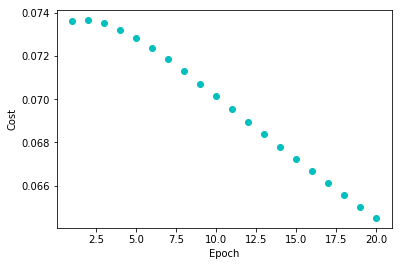

In [54]:
# 损失函数
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

# 梯度下降
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 准确率
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# 初始化所有变量
init = tf.initialize_all_variables()

# 训练模型
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(n_samples / batch_size)
        for i in range(total_batch):
            _, c = sess.run([optimizer, cost], 
                            feed_dict={x: x_train[i * batch_size : (i+1) * batch_size], 
                                      y: y_train[i * batch_size : (i+1) * batch_size, :].eval()})
            avg_cost = c / total_batch
        plt.plot(epoch+1, avg_cost, 'co')

        if (epoch+1) % display_step == 0:
            print("Epoch:", "%04d" % (epoch+1), "cost=", avg_cost)

    print("Optimization Finished!")

    print("Testing Accuracy:", accuracy.eval({x: x_train, y:y_train.eval()}))
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.show()